# High-level introduction to <code>pandas</code>
For a more complete introduction to <code>pandas</code>, see [https://pandas.pydata.org/](https://pandas.pydata.org/).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
s = {'a1': 'gino', 'a2': 'mario'}

## Series
Series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.).

In [3]:
data = np.random.randn(20)
index = range(1990, 2010)

In [4]:
print (data)
print (list(index))

[-0.51366536 -0.15451433 -0.94527088  1.4288987  -0.51608947  0.29135145
 -0.5120569   0.3763316   1.23801453  1.41478629  2.10096605 -1.40715889
 -0.40085701  2.33144052  1.64589857  0.2369746   1.20270092 -0.30280935
 -0.05115383  0.28059204]
[1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009]


In [5]:
y = pd.Series(data, index=index)

In [6]:
print (y)

1990   -0.513665
1991   -0.154514
1992   -0.945271
1993    1.428899
1994   -0.516089
1995    0.291351
1996   -0.512057
1997    0.376332
1998    1.238015
1999    1.414786
2000    2.100966
2001   -1.407159
2002   -0.400857
2003    2.331441
2004    1.645899
2005    0.236975
2006    1.202701
2007   -0.302809
2008   -0.051154
2009    0.280592
dtype: float64


In [13]:
salaries = {
    'gino': 1500, 'maria': 2560.34, 'luca': None, 'federico': 2451
}

In [14]:
s = pd.Series(salaries)

In [15]:
print (s)

gino        1500.00
maria       2560.34
luca            NaN
federico    2451.00
dtype: float64


### Access series as arrays

In [16]:
print (s[:2], '\n')
print (s[s > s.median()], '\n')
print (np.log(s), '\n')
print (s + s, '\n')
print (s * 3, '\n')
print (y[4:8] + y[4:10])

gino     1500.00
maria    2560.34
dtype: float64 

maria    2560.34
dtype: float64 

gino        7.313220
maria       7.847895
luca             NaN
federico    7.804251
dtype: float64 

gino        3000.00
maria       5120.68
luca            NaN
federico    4902.00
dtype: float64 

gino        4500.00
maria       7681.02
luca            NaN
federico    7353.00
dtype: float64 

1994   -1.032179
1995    0.582703
1996   -1.024114
1997    0.752663
1998         NaN
1999         NaN
dtype: float64


### Access series as dictionaries

In [17]:
y[1990]

-0.5136653576598494

# Data Frames
From [http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe)

DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object. Like Series, DataFrame accepts many different kinds of input:

- Dict of 1D ndarrays, lists, dicts, or Series
- 2-D numpy.ndarray
- Structured or record ndarray
- A Series
- Another DataFrame

Along with the data, you can optionally pass index (row labels) and columns (column labels) arguments. If you pass an index and / or columns, you are guaranteeing the index and / or columns of the resulting DataFrame. Thus, a dict of Series plus a specific index will discard all data not matching up to the passed index.

If axis labels are not passed, they will be constructed from the input data based on common sense rules.

In [18]:
k = {'years': y, 'salaries': s}
df = pd.DataFrame(k)

/anaconda3/lib/python3.7/site-packages/pandas/core/indexes/range.py:465: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  return self._int64index.union(other)


In [19]:
print (df)

             years  salaries
1990     -0.513665       NaN
1991     -0.154514       NaN
1992     -0.945271       NaN
1993      1.428899       NaN
1994     -0.516089       NaN
1995      0.291351       NaN
1996     -0.512057       NaN
1997      0.376332       NaN
1998      1.238015       NaN
1999      1.414786       NaN
2000      2.100966       NaN
2001     -1.407159       NaN
2002     -0.400857       NaN
2003      2.331441       NaN
2004      1.645899       NaN
2005      0.236975       NaN
2006      1.202701       NaN
2007     -0.302809       NaN
2008     -0.051154       NaN
2009      0.280592       NaN
gino           NaN   1500.00
maria          NaN   2560.34
luca           NaN       NaN
federico       NaN   2451.00


In [20]:
data = {}
for k, v in s.items():
    data[k] = {}
    for d, w in y.items():
        data[k][d] = v + (v*w)

In [21]:
ydf = pd.DataFrame(data)

In [24]:
print (ydf)

             gino        maria  luca     federico
1990   729.501964  1245.182038   NaN  1192.006208
1991  1268.228498  2164.730769   NaN  2072.285366
1992    82.093687   140.125168   NaN   134.141085
1993  3643.348049  6218.806497   NaN  5953.230713
1994   725.865793  1238.975483   NaN  1186.064706
1995  1937.027176  3306.298774   NaN  3165.102406
1996   731.914647  1249.300232   NaN  1195.948534
1997  2064.497399  3523.876846   NaN  3373.388749
1998  3357.021802  5730.078134   NaN  5485.373625
1999  3622.179428  6182.673919   NaN  5918.641186
2000  4651.449071  7939.527409   NaN  7600.467782
2001  -610.738340 -1042.465201   NaN  -997.946447
2002   898.714487  1534.009766   NaN  1468.499471
2003  4997.160776  8529.620413   NaN  8165.360707
2004  3968.847861  6774.399954   NaN  6485.097404
2005  1855.461898  3167.075543   NaN  3031.824741
2006  3304.051381  5639.663275   NaN  5398.819957
2007  1045.785977  1785.045112   NaN  1708.814286
2008  1423.269249  2429.368793   NaN  2325.621953


In [27]:
ydf.head(n=2)

,gino,maria,luca,federico
1990,729.501964,1245.182038,NaN,1192.006208
1991,1268.228498,2164.730769,NaN,2072.285366


In [28]:
ydf.shape

(20, 4)

In [29]:
pd.DataFrame.from_dict(data, orient='index').head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
federico,1192.006208,2072.285366,134.141085,5953.230713,1186.064706,3165.102406,1195.948534,3373.388749,5485.373625,5918.641186,7600.467782,-997.946447,1468.499471,8165.360707,6485.097404,3031.824741,5398.819957,1708.814286,2325.621953,3138.731087
gino,729.501964,1268.228498,82.093687,3643.348049,725.865793,1937.027176,731.914647,2064.497399,3357.021802,3622.179428,4651.449071,-610.738340,898.714487,4997.160776,3968.847861,1855.461898,3304.051381,1045.785977,1423.269249,1920.888058
luca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
maria,1245.182038,2164.730769,140.125168,6218.806497,1238.975483,3306.298774,1249.300232,3523.876846,5730.078134,6182.673919,7939.527409,-1042.465201,1534.009766,8529.620413,6774.399954,3167.075543,5639.663275,1785.045112,2429.368793,3278.751021


## Loading and manipulating data
Retrieve the complete local dataset from <a href="https://www.kaggle.com/daveianhickey/2000-16-traffic-flow-england-scotland-wales">Kaggle website</a>.

In [30]:
accidents = '/Users/alfio/Teaching/2018-19/generali/torino/pygen/data/trafficsample.csv'
A = pd.read_csv(accidents, low_memory=False, index_col=0)

In [31]:
A.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
175309,201243N075042,497930,188010,-0.588005,51.582399,43,3,2,1,04/04/2012,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,2,Yes,E01017821,2012
53367,2.01E+12,621820,309050,1.276633,52.633805,36,3,2,1,23/12/2013,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Wet/Damp,None,None,1,Yes,E01026840,2013
85873,201305DD03109,352450,397563,-2.717854,53.472632,5,2,5,3,14/06/2013,...,No physical crossing within 50 meters,Daylight: Street light present,Raining with high winds,Wet/Damp,None,None,1,Yes,E01006852,2013
359233,201243N210022,479520,194780,-0.852115,51.646155,43,3,1,1,21/02/2012,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,2,Yes,E01017916,2012
340672,201401GD11000,535170,185350,-0.051837,51.550802,1,3,2,1,09/12/2014,...,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,None,Pedestrian in carriageway (not injured),1,Yes,E01001734,2014


In [32]:
A.dtypes

Accident_Index                                  object
Location_Easting_OSGR                            int64
Location_Northing_OSGR                           int64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Date                                            object
Day_of_Week                                      int64
Time                                            object
Local_Authority_(District)                       int64
Local_Authority_(Highway)                       object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                       object
Speed_limit                                      int64
Junction_D

In [33]:
A[['Date', 'Time']].head()

,Date,Time
175309,04/04/2012,20:49
53367,23/12/2013,12:40
85873,14/06/2013,16:48
359233,21/02/2012,07:39
340672,09/12/2014,14:30


In [34]:
from datetime import datetime

def todate(d, t):
    try:
        dt = datetime.strptime(" ".join([d, t]), '%d/%m/%Y %H:%M')
    except TypeError:
        dt = np.nan
    return dt

In [35]:
A['Datetime'] = [todate(x.Date, x.Time) for i, x in A.iterrows()]

In [36]:
A.shape

(10000, 34)

In [37]:
A.dtypes

Accident_Index                                         object
Location_Easting_OSGR                                   int64
Location_Northing_OSGR                                  int64
Longitude                                             float64
Latitude                                              float64
Police_Force                                            int64
Accident_Severity                                       int64
Number_of_Vehicles                                      int64
Number_of_Casualties                                    int64
Date                                                   object
Day_of_Week                                             int64
Time                                                   object
Local_Authority_(District)                              int64
Local_Authority_(Highway)                              object
1st_Road_Class                                          int64
1st_Road_Number                                         int64
Road_Typ

## Access dataframe by index and col

In [38]:
A.iloc[2:6] # gets rows (or columns) at particular positions in the index (so it only takes integers).

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year,Datetime
85873,201305DD03109,352450,397563,-2.717854,53.472632,5,2,5,3,14/06/2013,...,Daylight: Street light present,Raining with high winds,Wet/Damp,None,None,1,Yes,E01006852,2013,2013-06-14 16:48:00
359233,201243N210022,479520,194780,-0.852115,51.646155,43,3,1,1,21/02/2012,...,Daylight: Street light present,Fine without high winds,Dry,None,None,2,Yes,E01017916,2012,2012-02-21 07:39:00
340672,201401GD11000,535170,185350,-0.051837,51.550802,1,3,2,1,09/12/2014,...,Daylight: Street light present,Fine without high winds,Dry,None,Pedestrian in carriageway (not injured),1,Yes,E01001734,2014,2014-12-09 14:30:00
369203,201342I202807,550055,223249,0.179006,51.887560,42,3,3,2,15/07/2013,...,Daylight: Street light present,Fine without high winds,Dry,None,None,2,Yes,E01022087,2013,2013-07-15 11:20:00


In [39]:
A.loc[[85873, 340672]] # gets rows (or columns) with particular labels from the index

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year,Datetime
85873,201305DD03109,352450,397563,-2.717854,53.472632,5,2,5,3,14/06/2013,...,Daylight: Street light present,Raining with high winds,Wet/Damp,None,None,1,Yes,E01006852,2013,2013-06-14 16:48:00
340672,201401GD11000,535170,185350,-0.051837,51.550802,1,3,2,1,09/12/2014,...,Daylight: Street light present,Fine without high winds,Dry,None,Pedestrian in carriageway (not injured),1,Yes,E01001734,2014,2014-12-09 14:30:00


In [40]:
selection = A[A['Road_Surface_Conditions'] == 'Dry'].sort_values(
    'Number_of_Casualties', ascending=False)

In [41]:
selection[['Weather_Conditions', 'Police_Force', 
           'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties']].head()

,Weather_Conditions,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties
342377,Fine without high winds,61,3,2,21
21228,Fine without high winds,50,3,2,10
47734,Fine without high winds,44,2,1,10
387706,Fine without high winds,5,3,5,9
301798,Unknown,6,3,2,9


In [44]:
selection.shape

(6821, 34)

In [42]:
selection[['Weather_Conditions', 'Police_Force', 'Accident_Severity', 
           'Number_of_Vehicles', 'Number_of_Casualties']].groupby(
    'Weather_Conditions').mean()

,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties
Weather_Conditions,,,,
Fine with high winds,29.060000,2.780000,1.720000,1.300000
Fine without high winds,27.135616,2.832725,1.844444,1.328767
Fog or mist,38.636364,2.818182,1.636364,1.090909
Other,35.200000,2.800000,1.900000,1.233333
Raining with high winds,29.250000,2.500000,2.000000,1.000000
Raining without high winds,42.600000,2.700000,1.900000,1.200000
Unknown,27.760274,2.883562,1.787671,1.267123


In [45]:
sel = selection[['Weather_Conditions', 'Police_Force', 'Accident_Severity', 
           'Number_of_Vehicles', 'Number_of_Casualties', 'Datetime']]

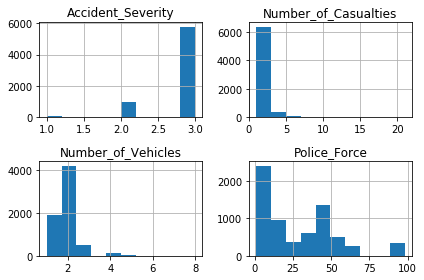

In [52]:
sel.hist()
plt.tight_layout()
plt.show()

In [53]:
minutes = []
for i, row in sel.iterrows():
    h, m = row['Datetime'].hour, row['Datetime'].minute
    minutes.append(h*60 + m)
sel = sel.copy()
sel['Minutes'] = minutes

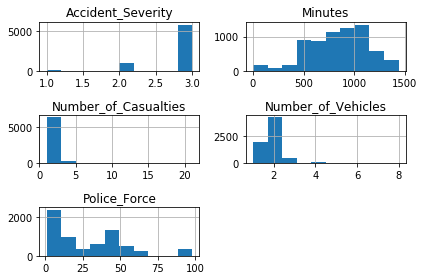

In [54]:
sel.hist()
plt.tight_layout()
plt.show()

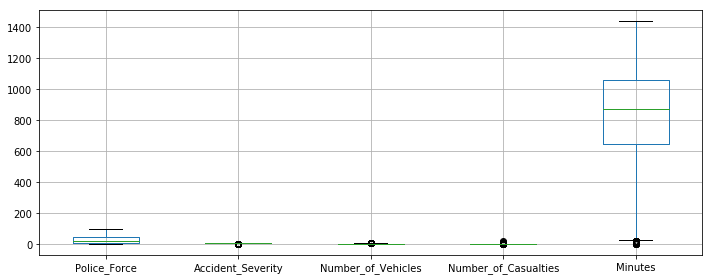

In [55]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 4), sharey=True)
sel.boxplot(ax=axes)
plt.tight_layout()
plt.show()

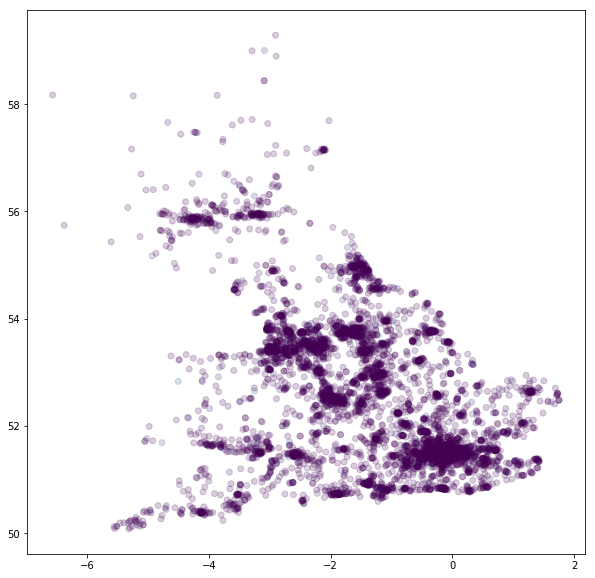

In [58]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), sharey=True)
axes.scatter(selection.Longitude.values, selection.Latitude.values, 
             c=selection.Number_of_Casualties, alpha=0.2)
plt.show()

In [59]:
import geopandas as gpd

In [60]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [61]:
UK = world[world['iso_a3']=='GBR']

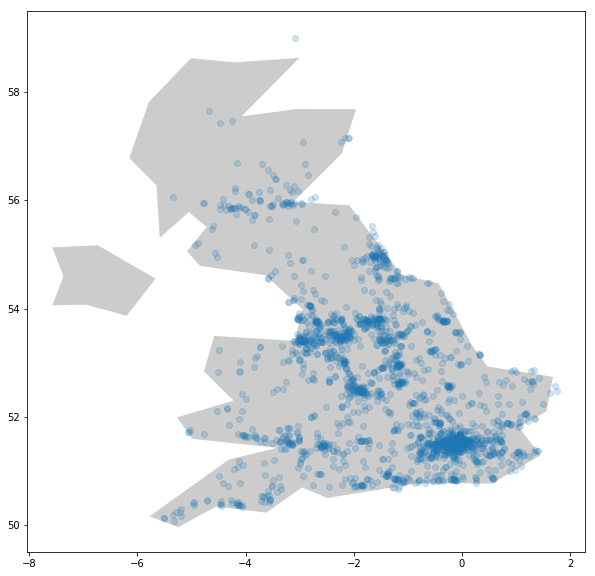

In [62]:
limit = 2000
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), sharey=True)
UK.plot(ax=axes, color='#CCCCCC')
axes.scatter(selection.Longitude.values[:limit], selection.Latitude.values[:limit], alpha=0.2)
plt.show()

# Example 1: k-means
Implement k-means using <code>NumPy</code> and functions